<a href="https://colab.research.google.com/github/RajDK15/Google_Colab_Projects/blob/main/Gamma_Hadron_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gamma_Hadron_Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
col = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names = col)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
## class 0 = h, 1 = g
df["class"] = (df["class"] == "g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

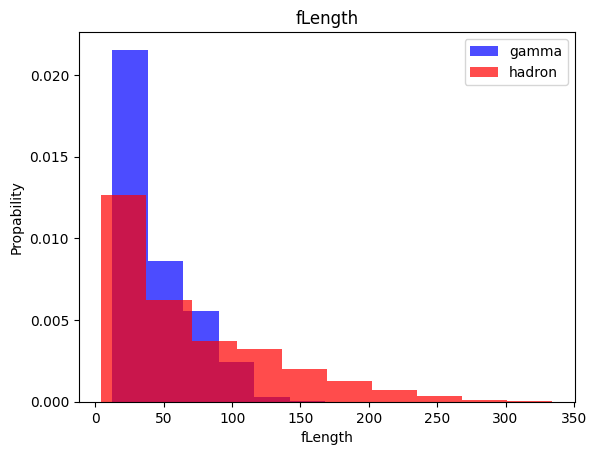

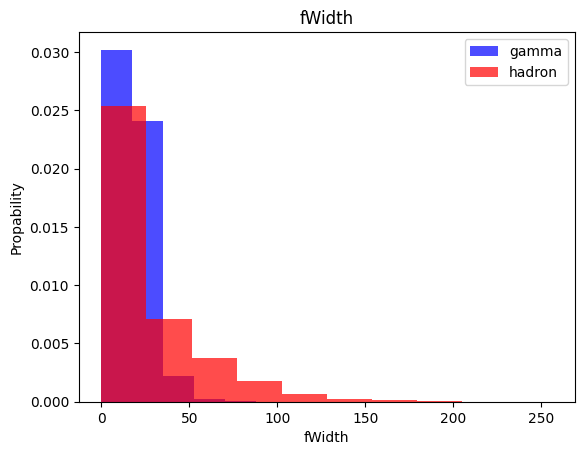

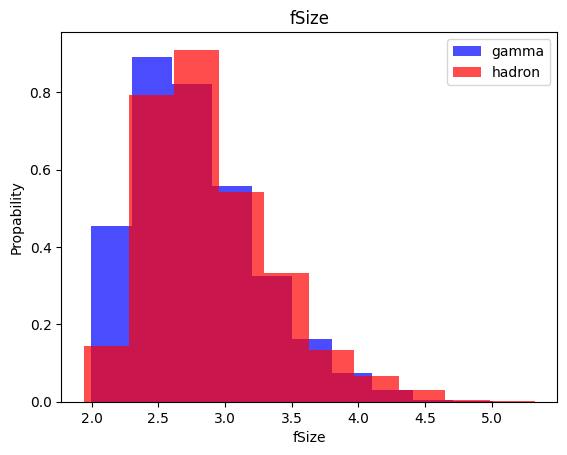

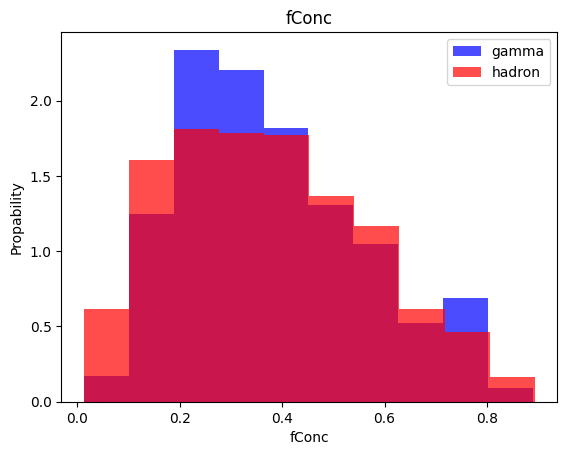

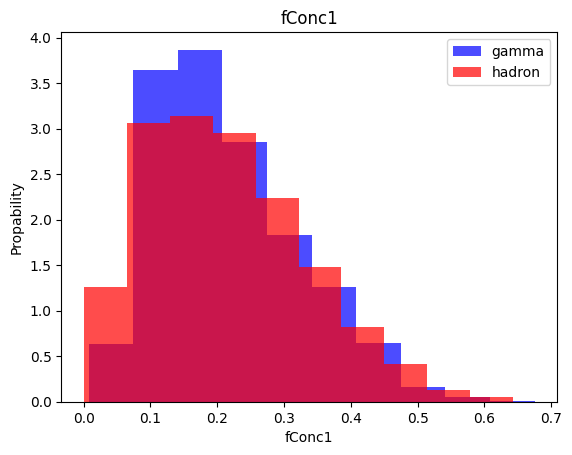

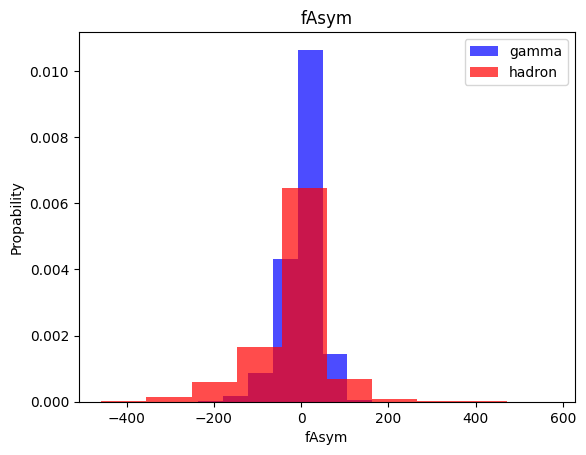

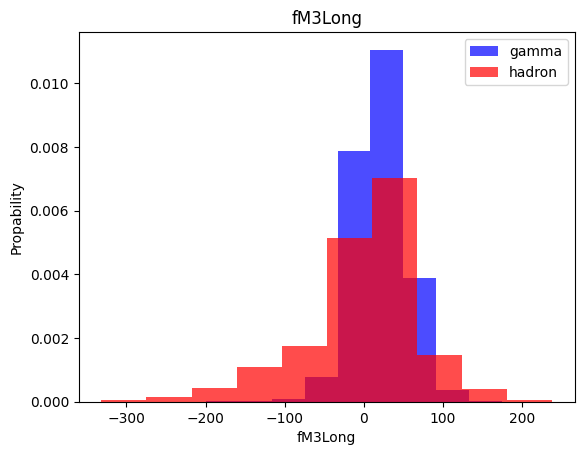

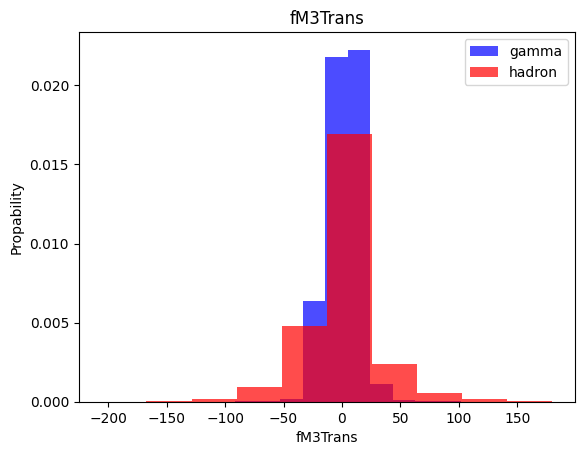

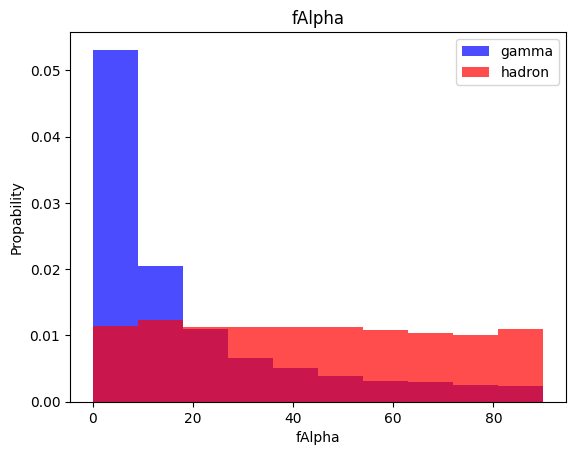

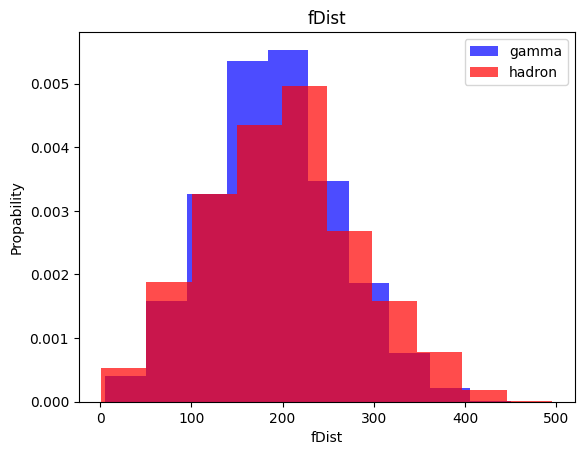

In [ ]:
for label in col[:-1]:
    plt.hist(df[df["class"] == 1] [label], color =  'blue', label = 'gamma', alpha = 0.7,density = True )
    plt.hist(df[df["class"] == 0] [label], color =  'red', label = 'hadron', alpha = 0.7,density = True )
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Propability')
    plt.legend()
    plt.show()

In [ ]:
# creating the training, validation and test set
train, test, valid = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataframe(dataframe, oversample = False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
      ros = RandomOverSampler()
      x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [ ]:
train, x_train, y_train = scale_dataframe(train, oversample = True)
valid, x_valid, y_valid = scale_dataframe(valid, oversample = False)
test, x_test, y_test = scale_dataframe(test, oversample = False)

## kNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1318
           1       0.84      0.89      0.86      2486

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.39      0.49      1318
           1       0.73      0.88      0.80      2486

    accuracy                           0.71      3804
   macro avg       0.68      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1318
           1       0.85      0.82      0.83      2486

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



  ## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1318
           1       0.89      0.91      0.90      2486

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



## Neural Network Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentrpy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()


# def plot_accuracy(history):
#   plt.plot(history.history['accuracy'], label = 'accuracy')
#   plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
#   plt.xlabel('Epoch')
#   plt.ylabel('Accuracy')
#   plt.legend()
#   plt.grid(True)
#   plt.show()


In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
  history = nn_model.fit(
    x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0
  )

  return nn_model, history

16 nodes, 0 dropout, 0.01 lr, 32 batch_size


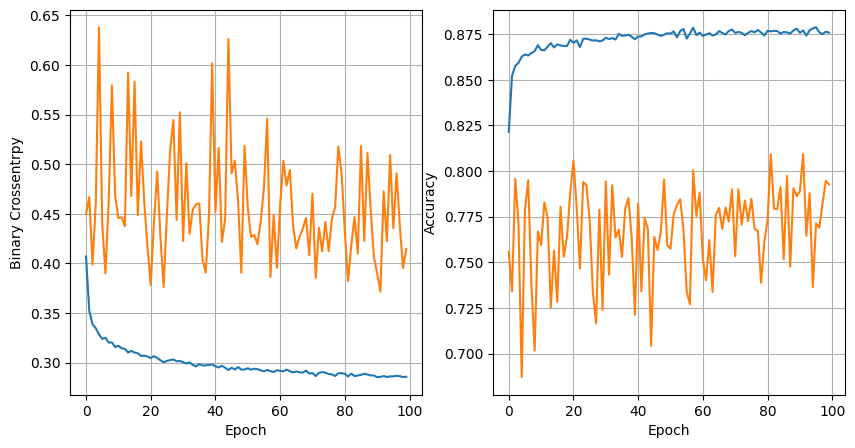

119/119 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8649
16 nodes, 0 dropout, 0.01 lr, 64 batch_size


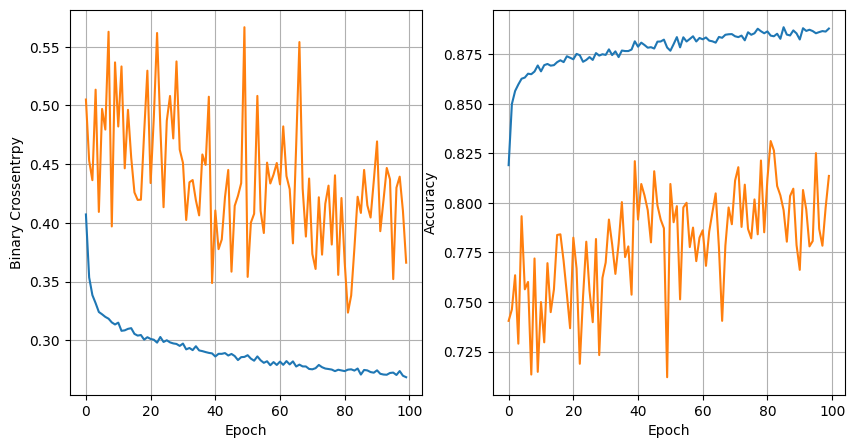

119/119 [==============================] - 0s 4ms/step - loss: 0.3310 - accuracy: 0.8591
16 nodes, 0 dropout, 0.01 lr, 128 batch_size


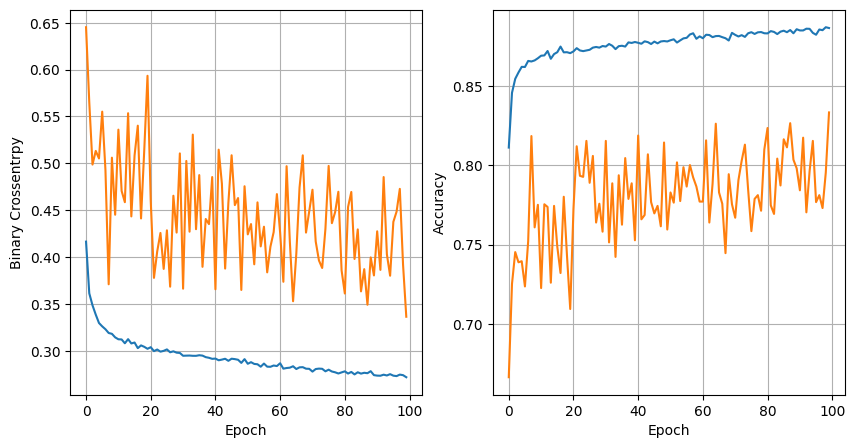

119/119 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8591
16 nodes, 0 dropout, 0.005 lr, 32 batch_size


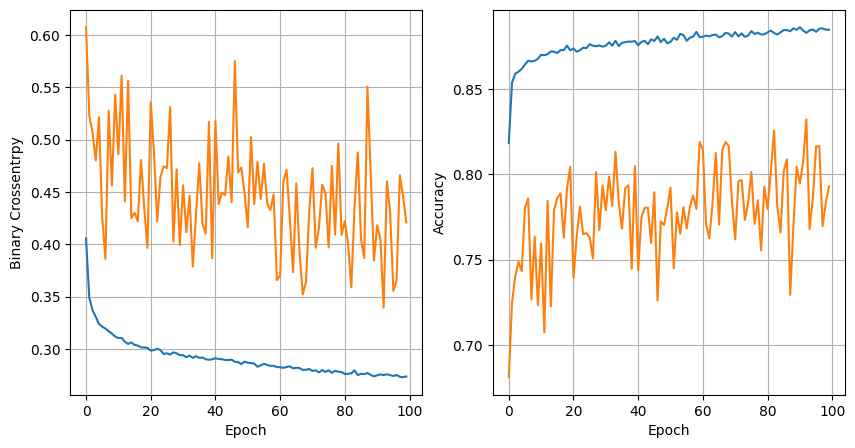

119/119 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8728
16 nodes, 0 dropout, 0.005 lr, 64 batch_size


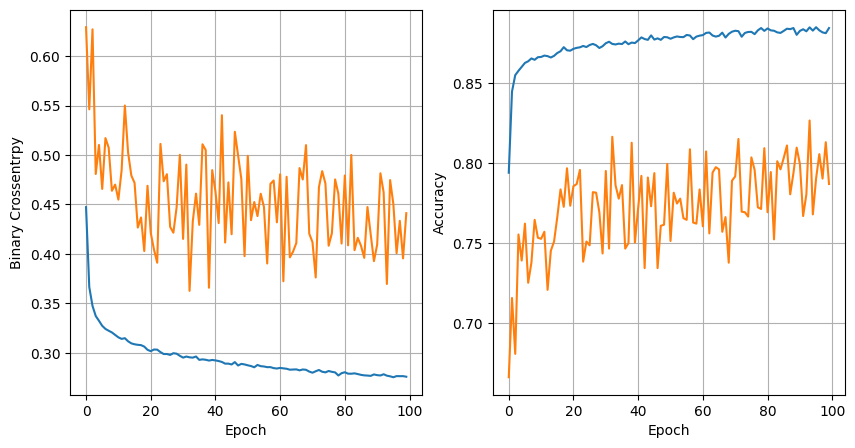

119/119 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8701
16 nodes, 0 dropout, 0.005 lr, 128 batch_size


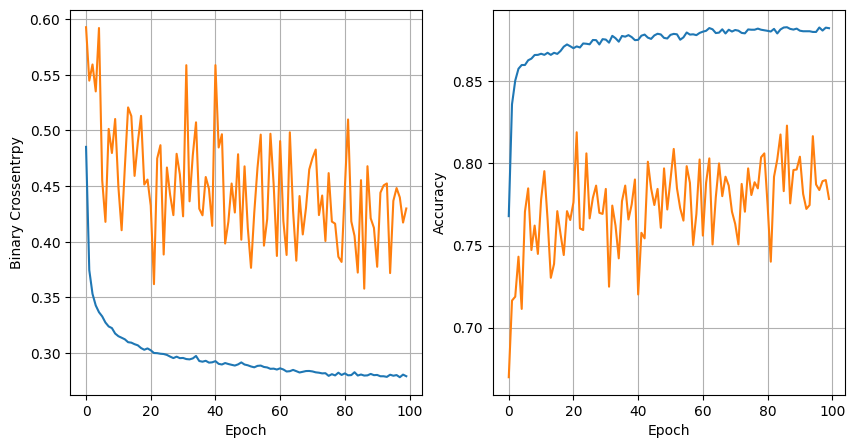

119/119 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8641
16 nodes, 0 dropout, 0.001 lr, 32 batch_size


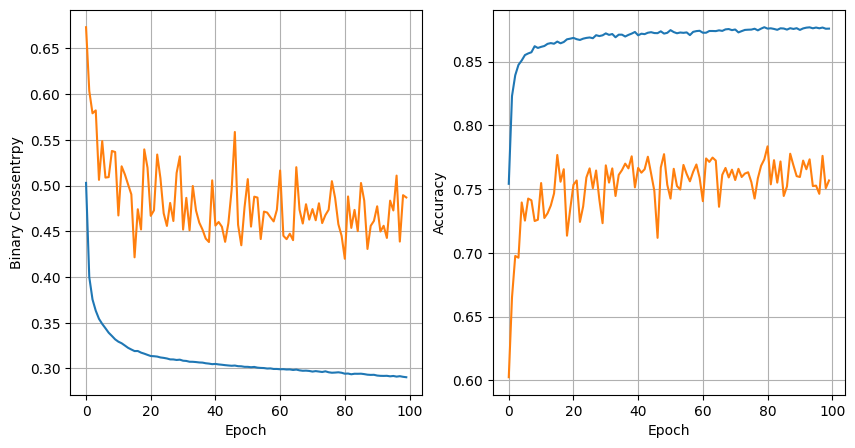

119/119 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.8746
16 nodes, 0 dropout, 0.001 lr, 64 batch_size


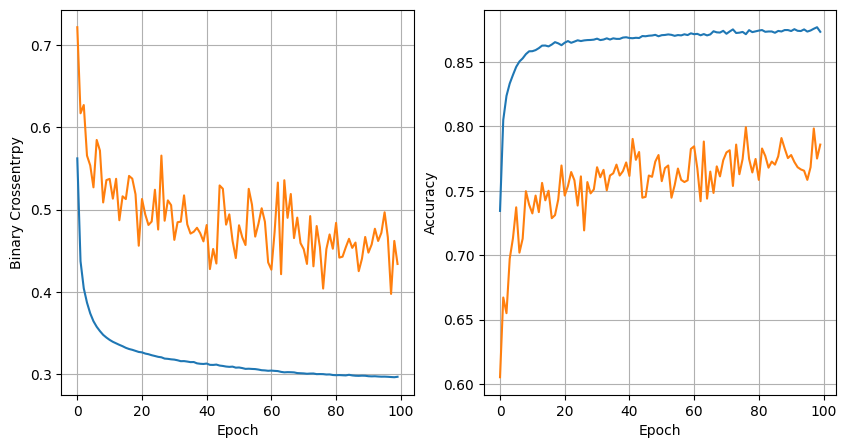

119/119 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8709
16 nodes, 0 dropout, 0.001 lr, 128 batch_size


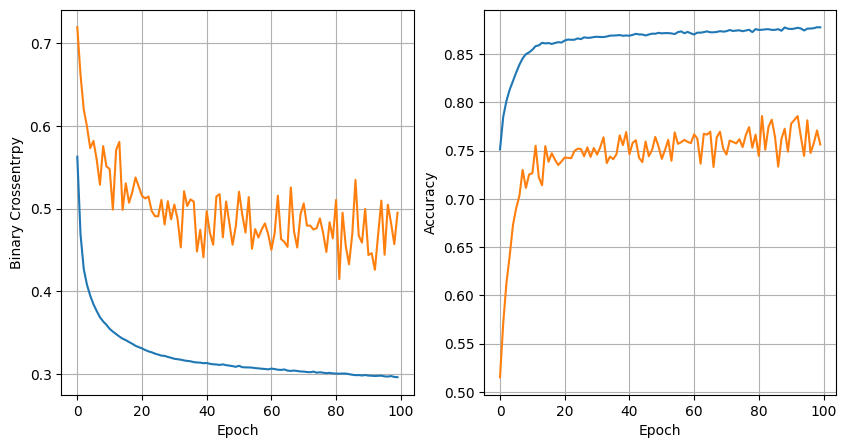

119/119 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8717
16 nodes, 0.2 dropout, 0.01 lr, 32 batch_size


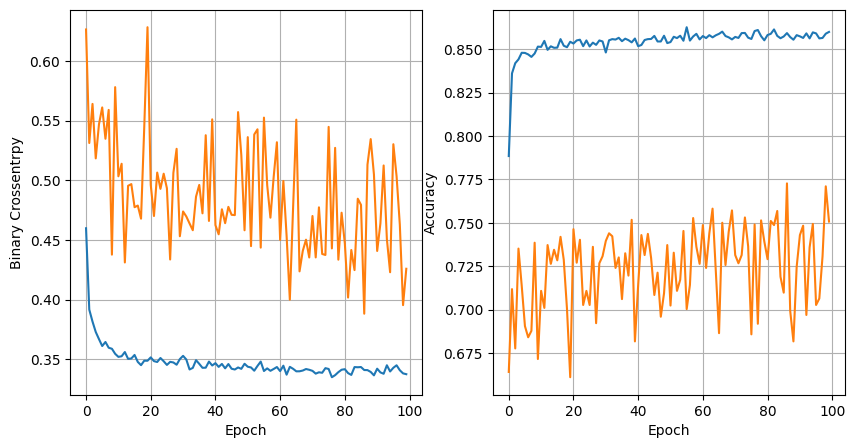

119/119 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8675
16 nodes, 0.2 dropout, 0.01 lr, 64 batch_size


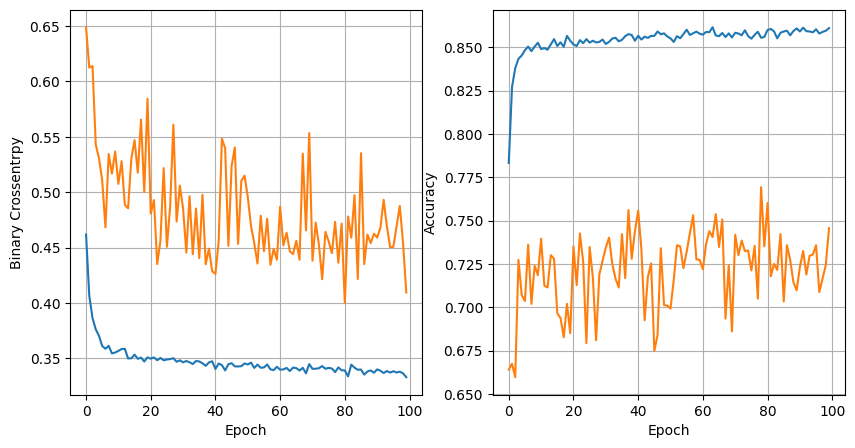

119/119 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8678
16 nodes, 0.2 dropout, 0.01 lr, 128 batch_size


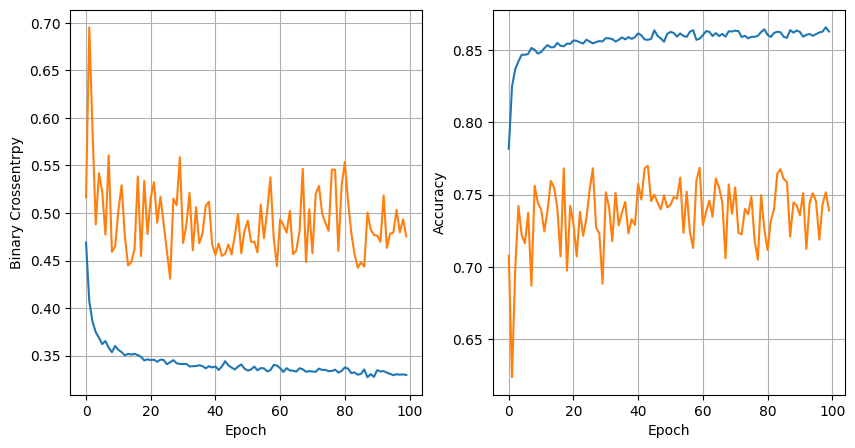

119/119 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8680
16 nodes, 0.2 dropout, 0.005 lr, 32 batch_size


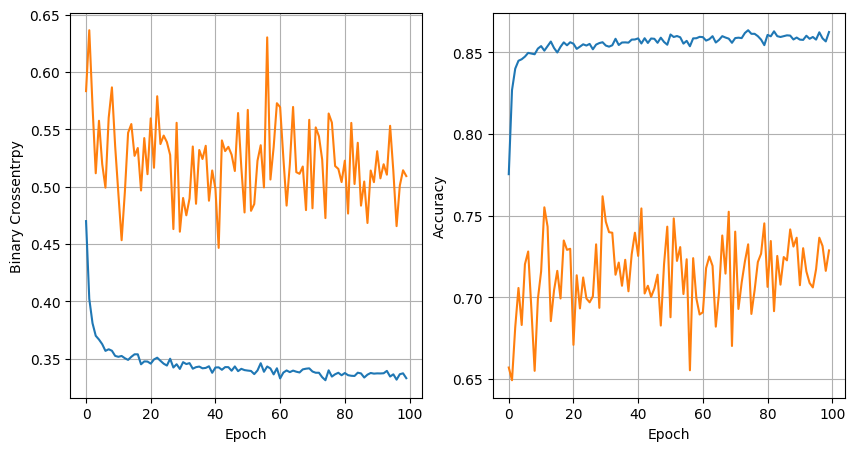

119/119 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.8675
16 nodes, 0.2 dropout, 0.005 lr, 64 batch_size


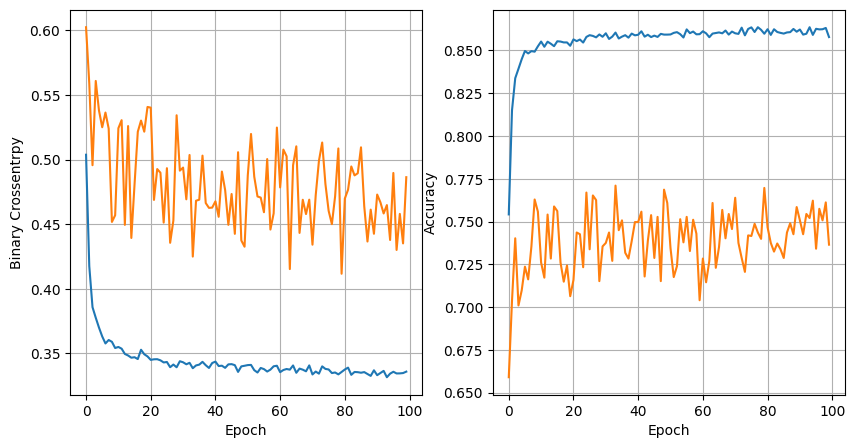

119/119 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8667
16 nodes, 0.2 dropout, 0.005 lr, 128 batch_size


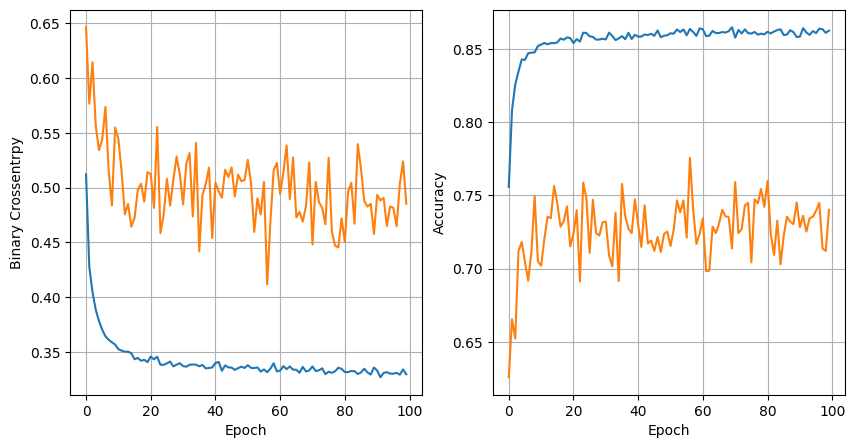

119/119 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8662
16 nodes, 0.2 dropout, 0.001 lr, 32 batch_size


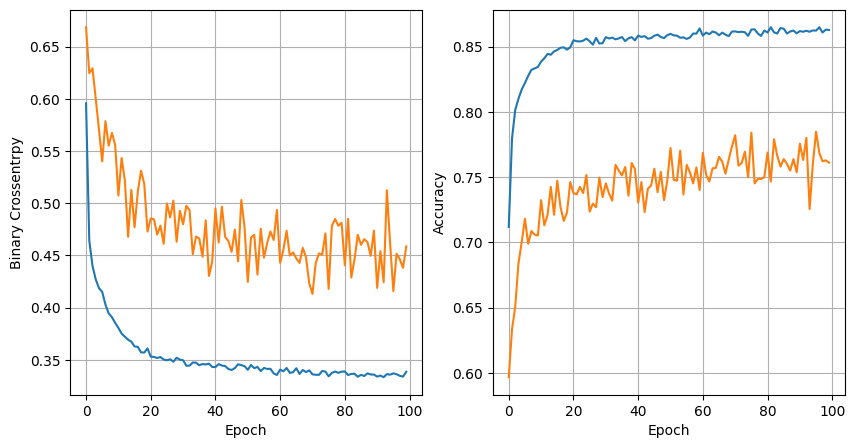

119/119 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8667
16 nodes, 0.2 dropout, 0.001 lr, 64 batch_size


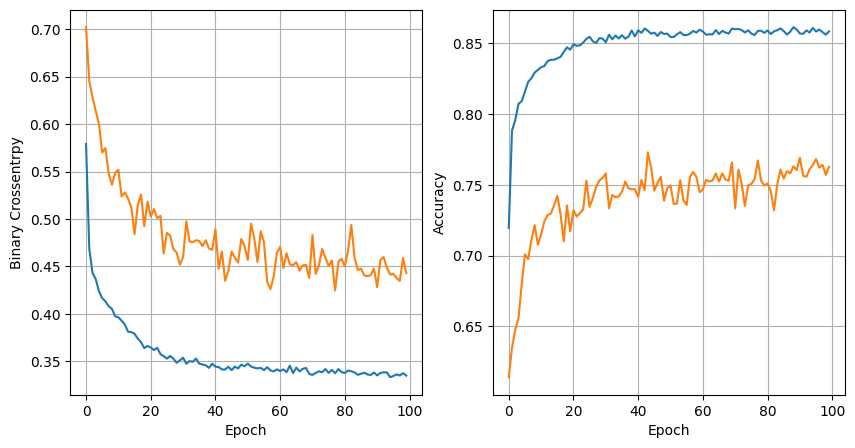

119/119 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8657
16 nodes, 0.2 dropout, 0.001 lr, 128 batch_size


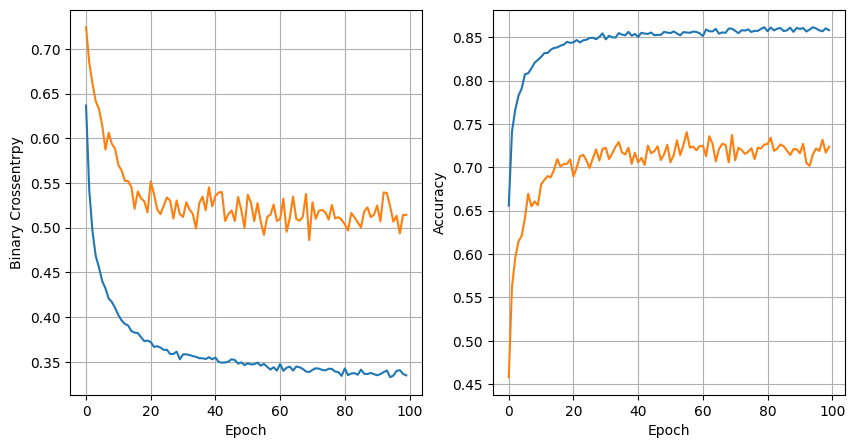

119/119 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8662
32 nodes, 0 dropout, 0.01 lr, 32 batch_size


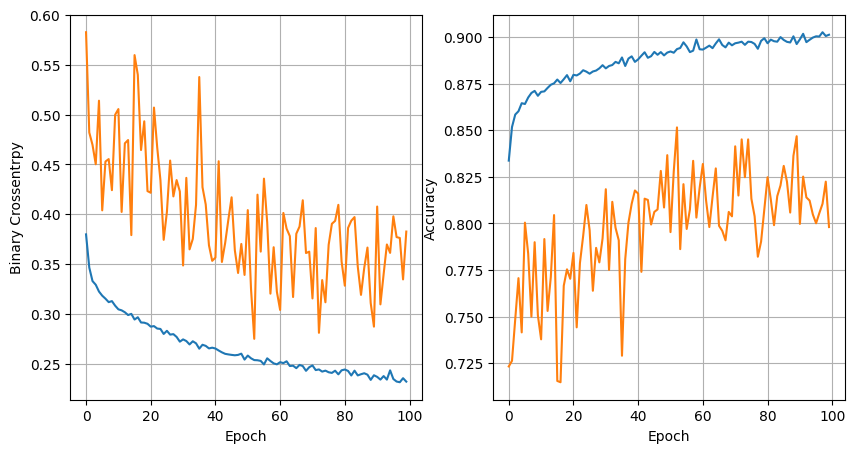

119/119 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8667
32 nodes, 0 dropout, 0.01 lr, 64 batch_size


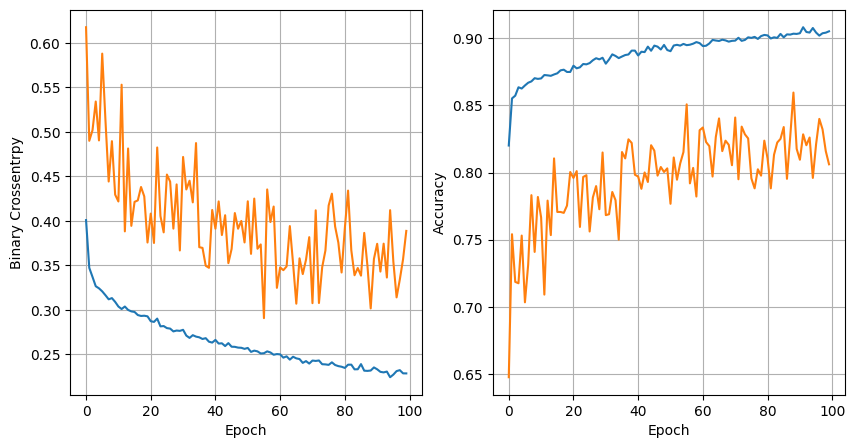

119/119 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.8625
32 nodes, 0 dropout, 0.01 lr, 128 batch_size


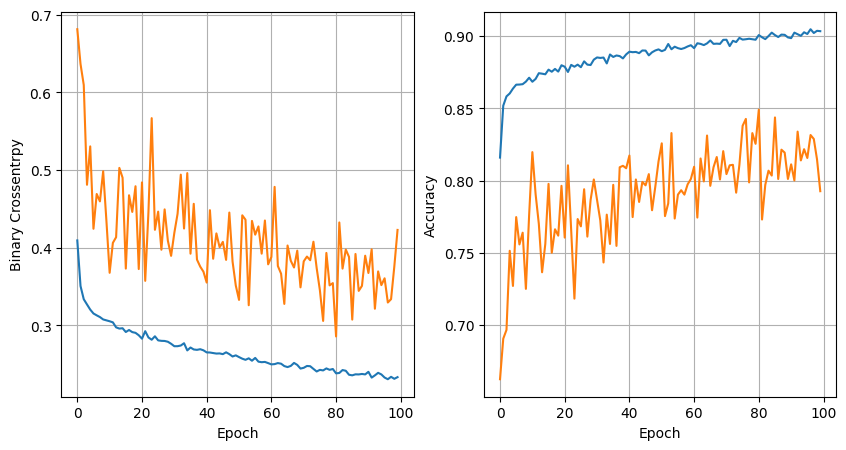

119/119 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8675
32 nodes, 0 dropout, 0.005 lr, 32 batch_size


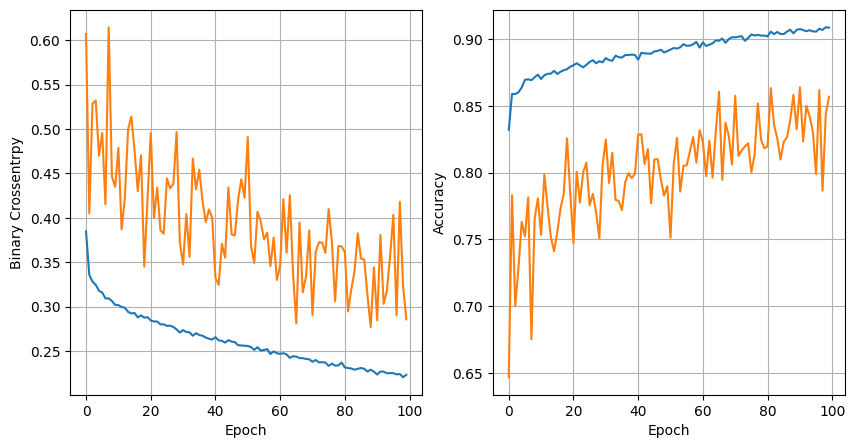

119/119 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8507
32 nodes, 0 dropout, 0.005 lr, 64 batch_size


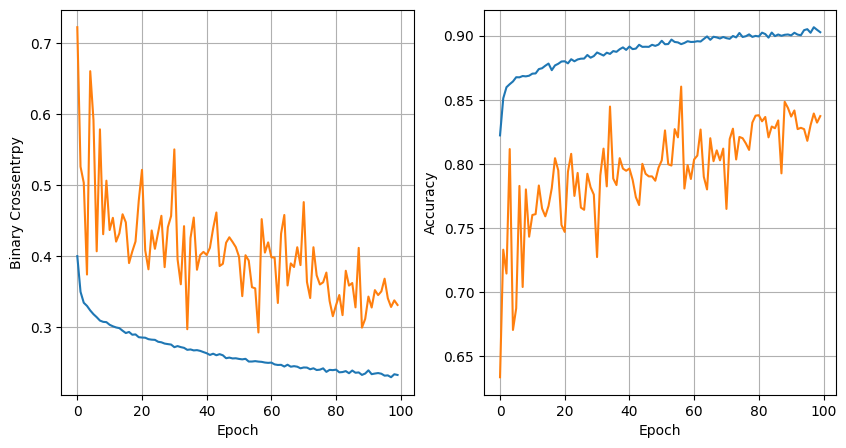

119/119 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8609
32 nodes, 0 dropout, 0.005 lr, 128 batch_size


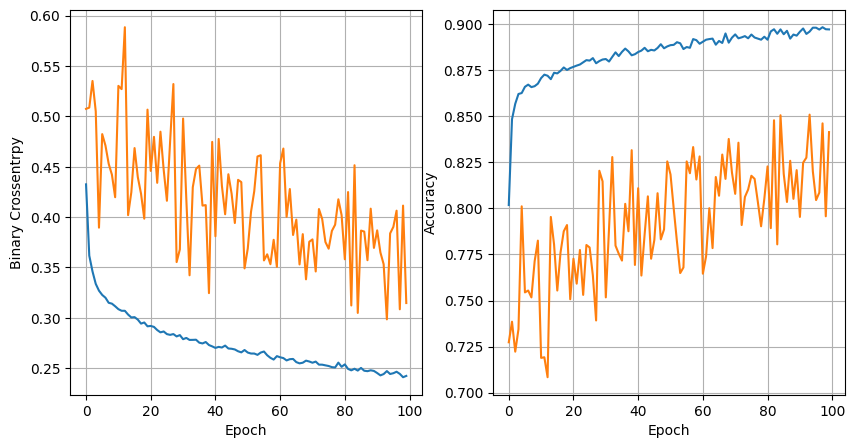

119/119 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8607
32 nodes, 0 dropout, 0.001 lr, 32 batch_size


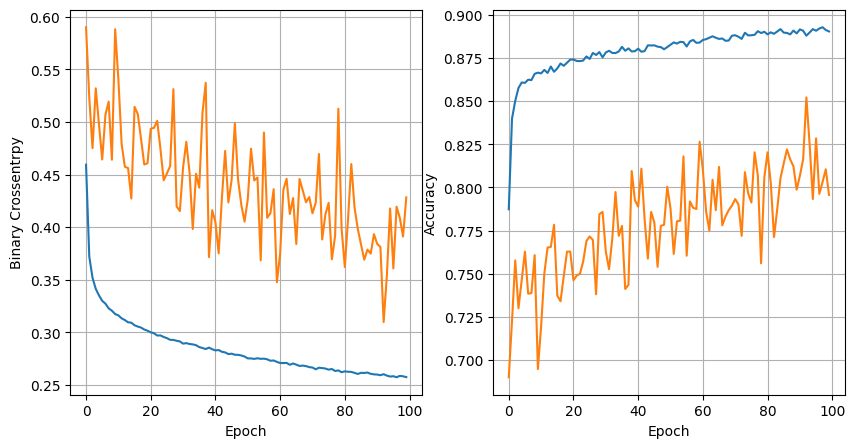

119/119 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8712
32 nodes, 0 dropout, 0.001 lr, 64 batch_size


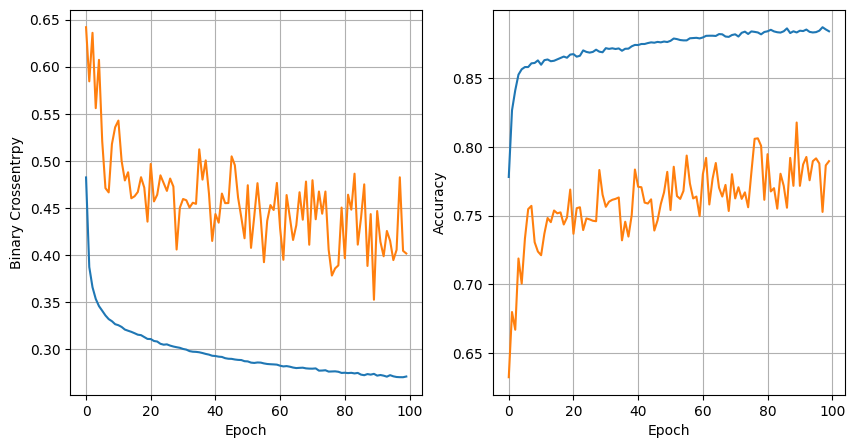

119/119 [==============================] - 1s 4ms/step - loss: 0.3147 - accuracy: 0.8751
32 nodes, 0 dropout, 0.001 lr, 128 batch_size


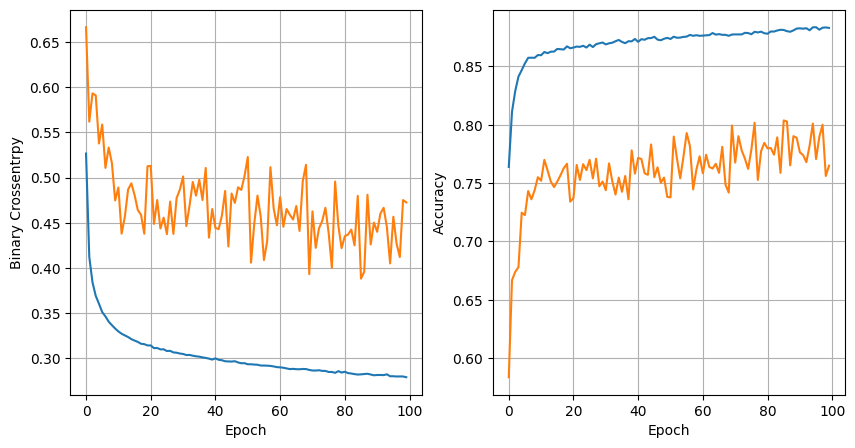

119/119 [==============================] - 0s 3ms/step - loss: 0.3247 - accuracy: 0.8678
32 nodes, 0.2 dropout, 0.01 lr, 32 batch_size


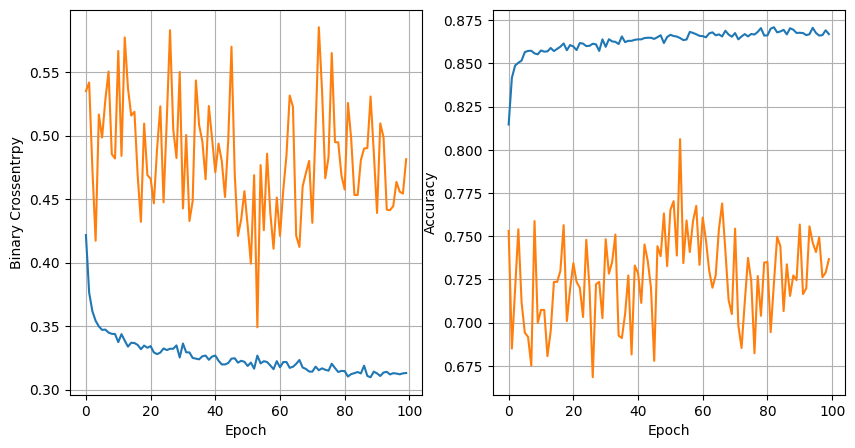

119/119 [==============================] - 0s 3ms/step - loss: 0.3167 - accuracy: 0.8720
32 nodes, 0.2 dropout, 0.01 lr, 64 batch_size


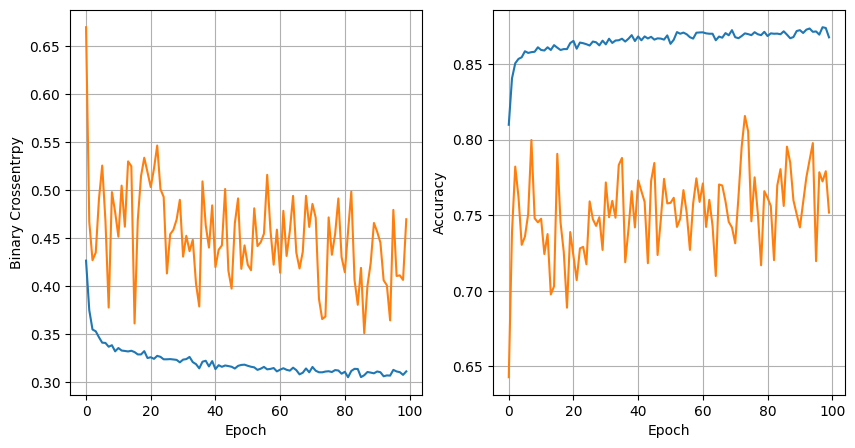

119/119 [==============================] - 0s 3ms/step - loss: 0.3107 - accuracy: 0.8746
32 nodes, 0.2 dropout, 0.01 lr, 128 batch_size


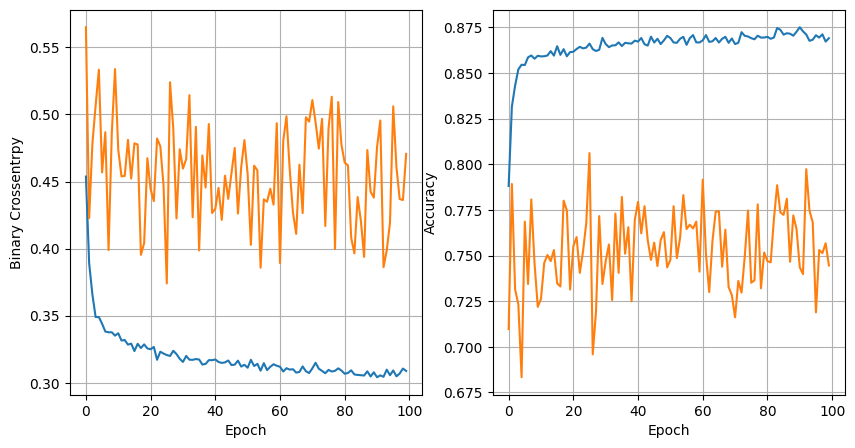

119/119 [==============================] - 0s 3ms/step - loss: 0.3183 - accuracy: 0.8715
32 nodes, 0.2 dropout, 0.005 lr, 32 batch_size


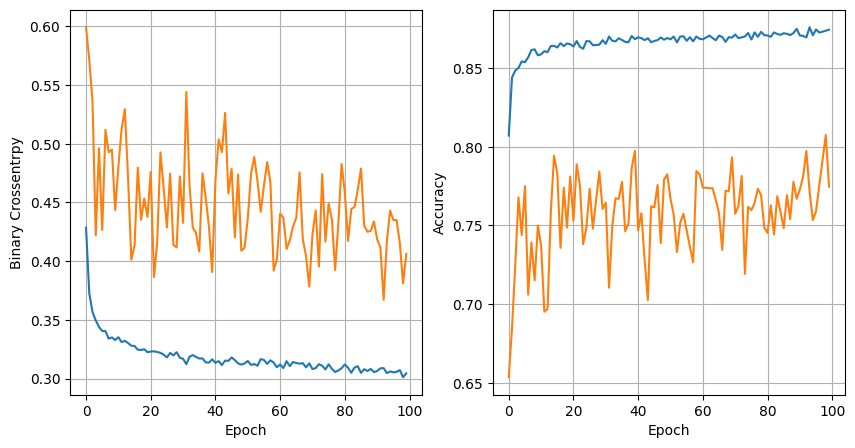

119/119 [==============================] - 0s 4ms/step - loss: 0.3091 - accuracy: 0.8778
32 nodes, 0.2 dropout, 0.005 lr, 64 batch_size


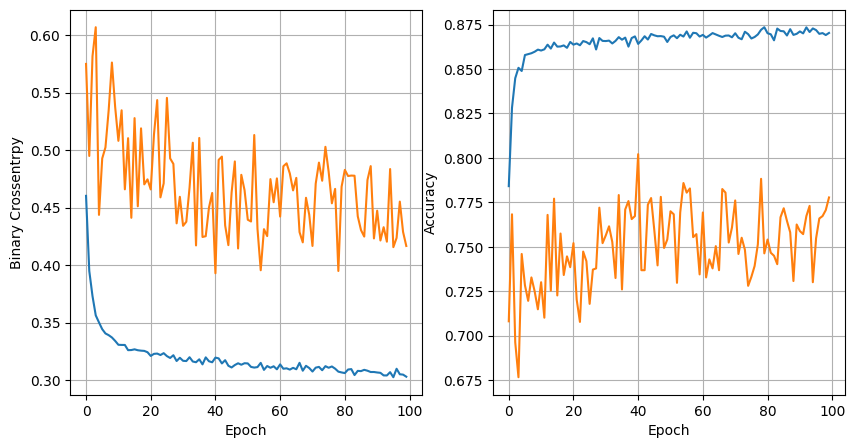

119/119 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8701
32 nodes, 0.2 dropout, 0.005 lr, 128 batch_size


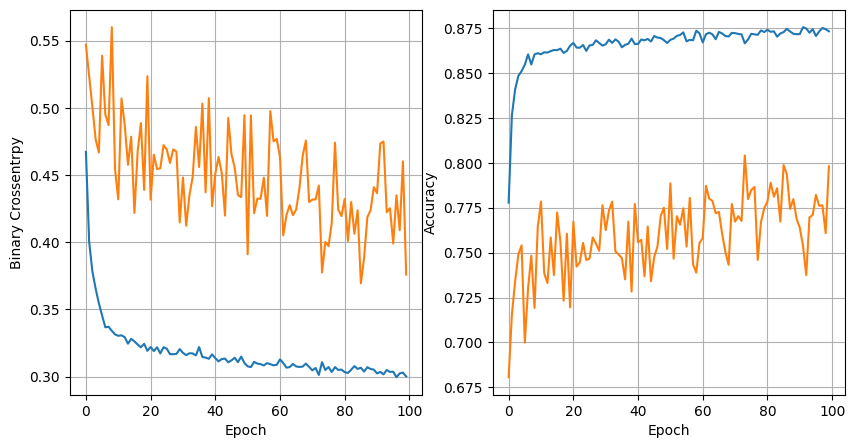

119/119 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.8733
32 nodes, 0.2 dropout, 0.001 lr, 32 batch_size


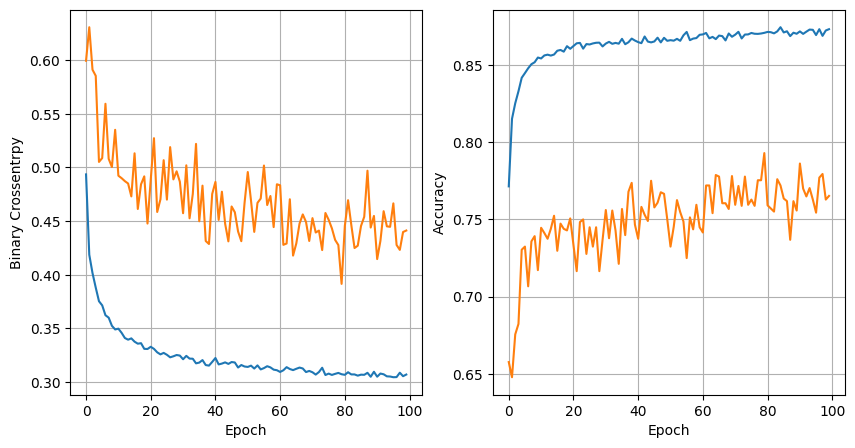

119/119 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.8715
32 nodes, 0.2 dropout, 0.001 lr, 64 batch_size


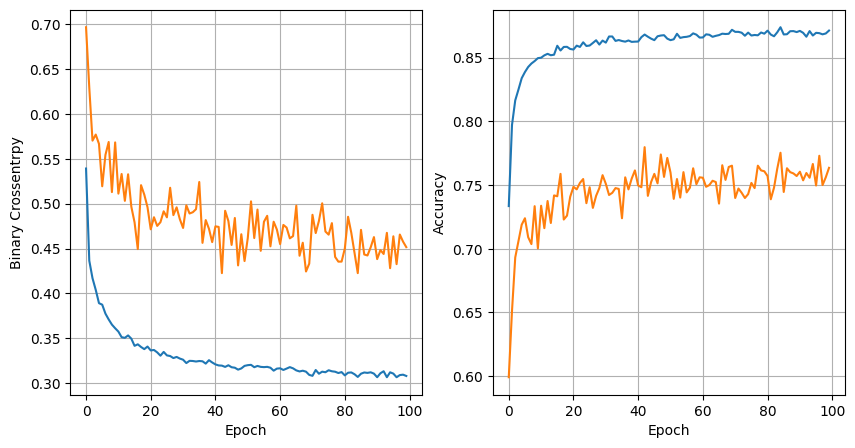

119/119 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8715
32 nodes, 0.2 dropout, 0.001 lr, 128 batch_size


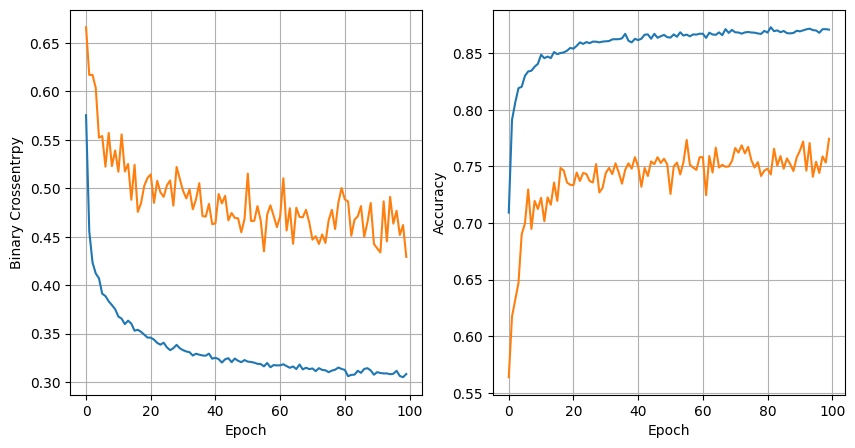

119/119 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8704
64 nodes, 0 dropout, 0.01 lr, 32 batch_size


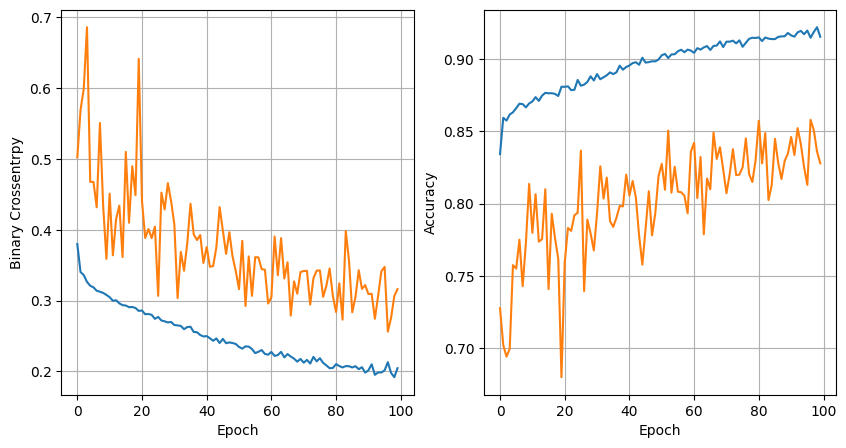

119/119 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8549
64 nodes, 0 dropout, 0.01 lr, 64 batch_size


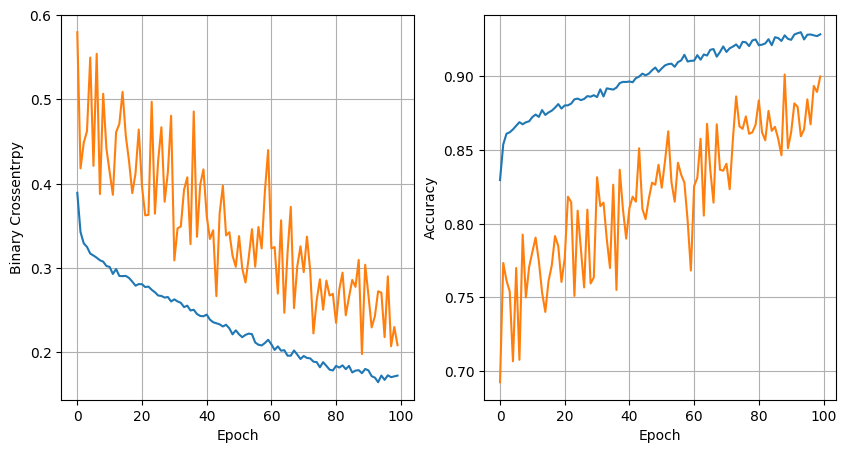

119/119 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.8481
64 nodes, 0 dropout, 0.01 lr, 128 batch_size


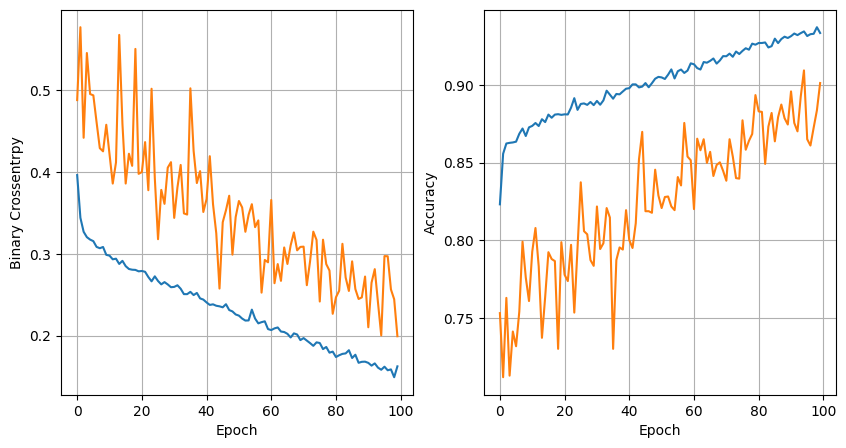

119/119 [==============================] - 1s 5ms/step - loss: 0.5431 - accuracy: 0.8491
64 nodes, 0 dropout, 0.005 lr, 32 batch_size


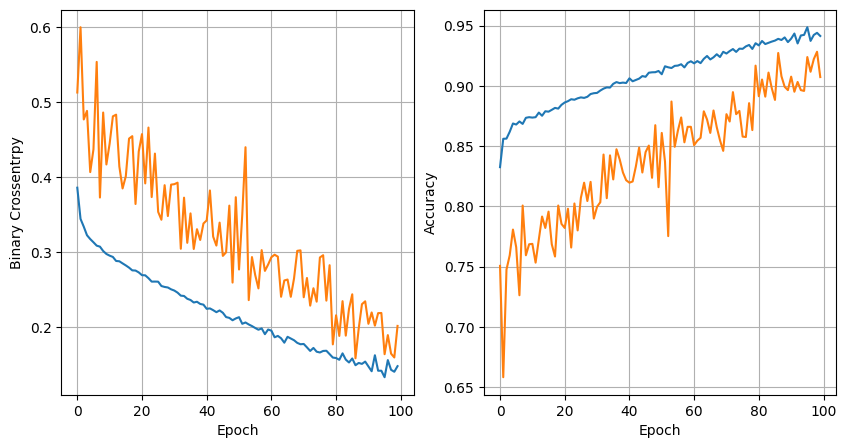

119/119 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.8515
64 nodes, 0 dropout, 0.005 lr, 64 batch_size


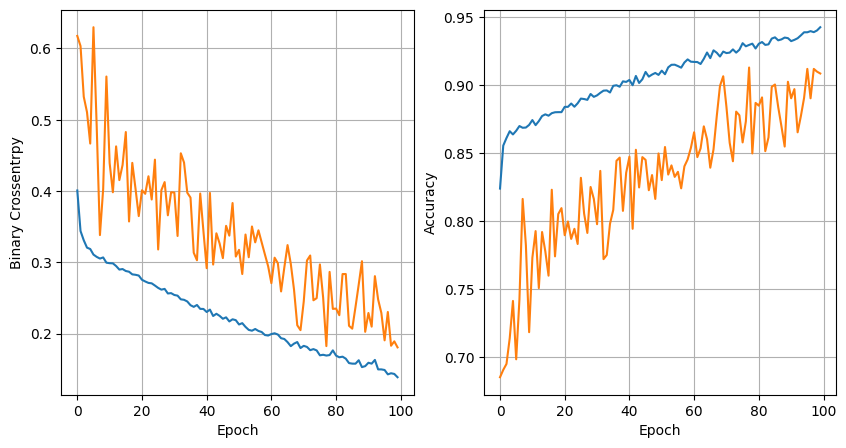

119/119 [==============================] - 0s 4ms/step - loss: 0.5693 - accuracy: 0.8449
64 nodes, 0 dropout, 0.005 lr, 128 batch_size


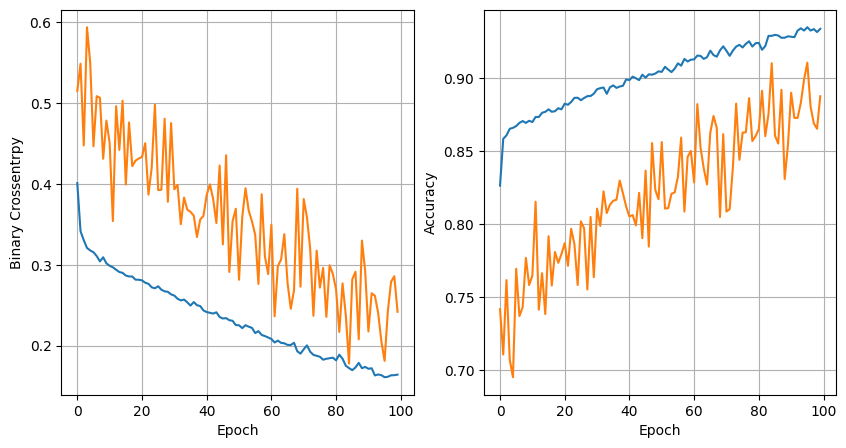

119/119 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.8494
64 nodes, 0 dropout, 0.001 lr, 32 batch_size


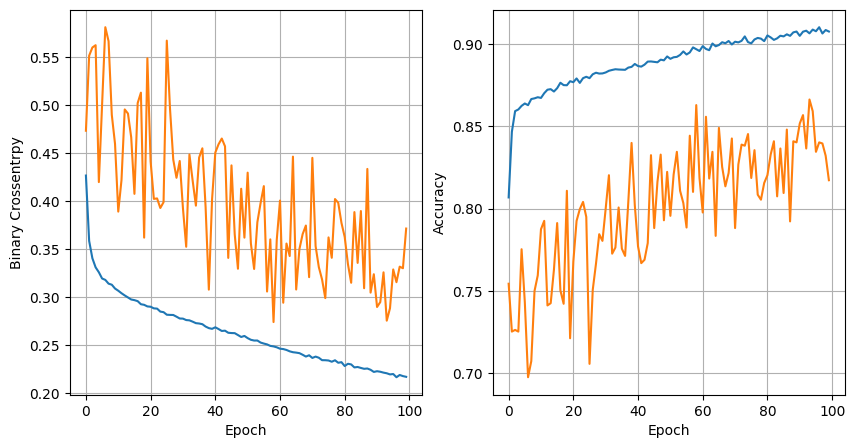

119/119 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.8701
64 nodes, 0 dropout, 0.001 lr, 64 batch_size


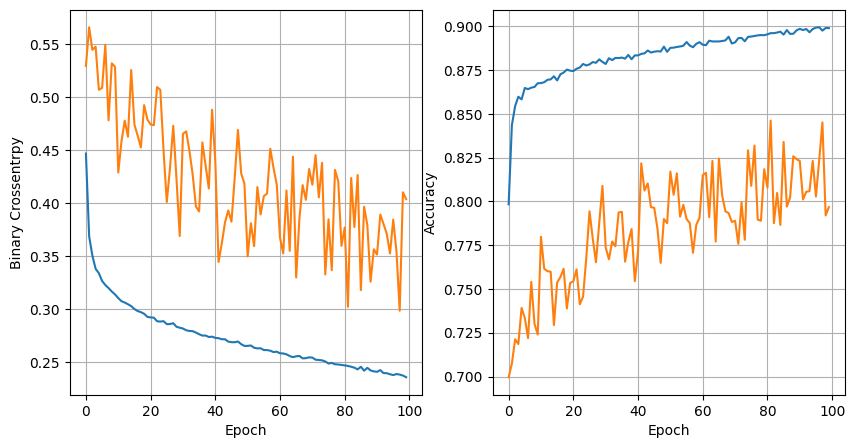

119/119 [==============================] - 0s 3ms/step - loss: 0.3318 - accuracy: 0.8709
64 nodes, 0 dropout, 0.001 lr, 128 batch_size


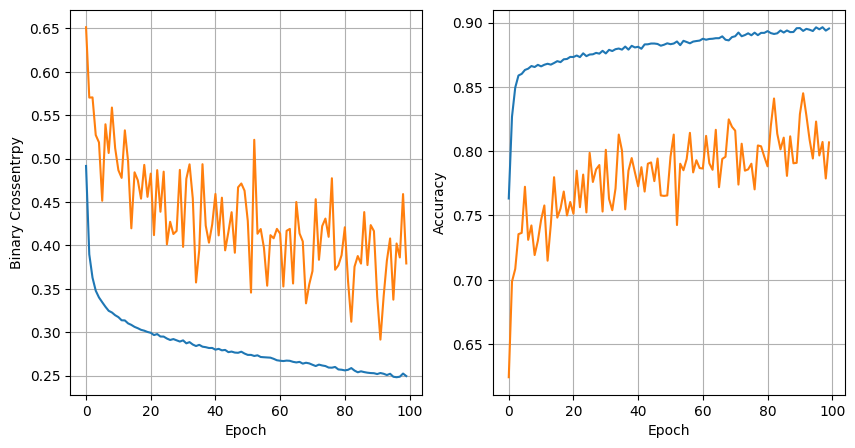

119/119 [==============================] - 1s 4ms/step - loss: 0.3224 - accuracy: 0.8728
64 nodes, 0.2 dropout, 0.01 lr, 32 batch_size


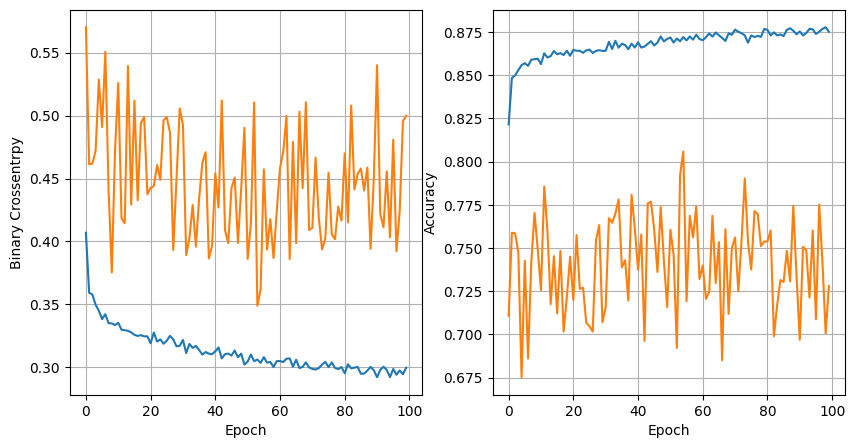

119/119 [==============================] - 0s 3ms/step - loss: 0.3348 - accuracy: 0.8725
64 nodes, 0.2 dropout, 0.01 lr, 64 batch_size


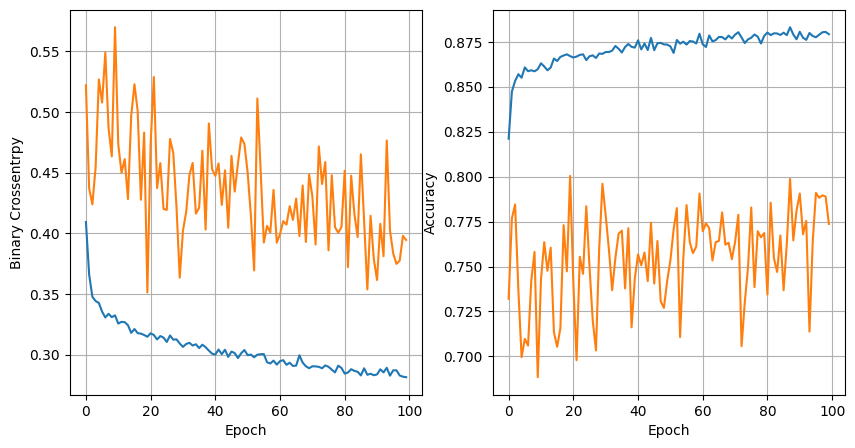

119/119 [==============================] - 0s 3ms/step - loss: 0.3191 - accuracy: 0.8680
64 nodes, 0.2 dropout, 0.01 lr, 128 batch_size


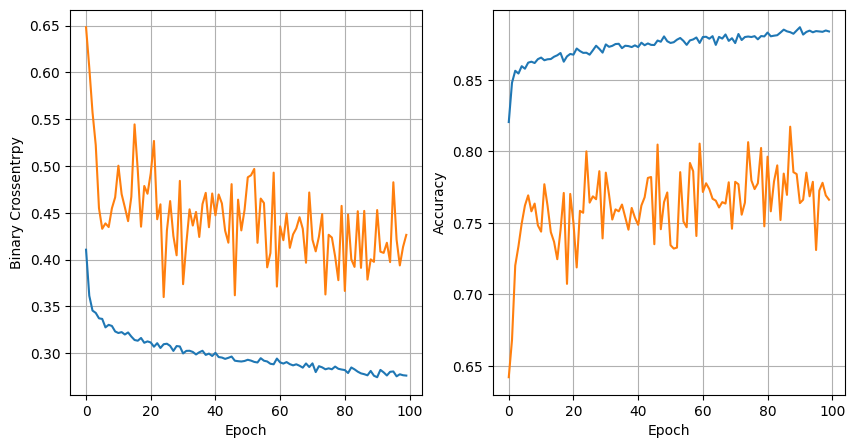

119/119 [==============================] - 0s 3ms/step - loss: 0.3226 - accuracy: 0.8733
64 nodes, 0.2 dropout, 0.005 lr, 32 batch_size


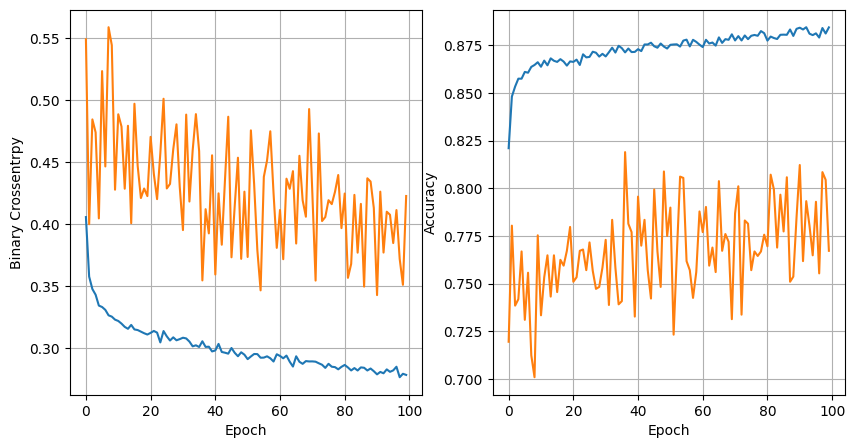

119/119 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8717
64 nodes, 0.2 dropout, 0.005 lr, 64 batch_size


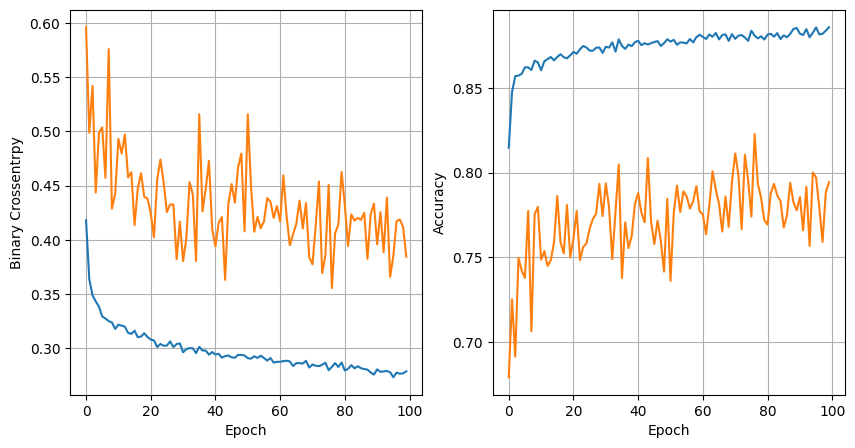

119/119 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.8733
64 nodes, 0.2 dropout, 0.005 lr, 128 batch_size


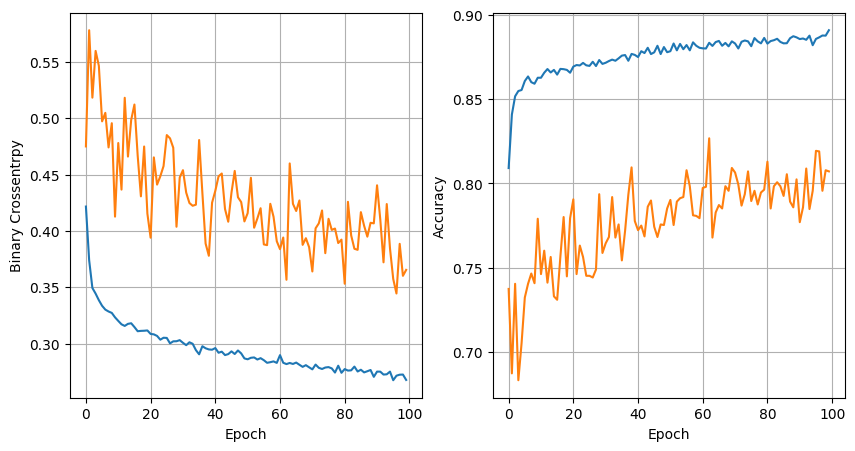

119/119 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.8749
64 nodes, 0.2 dropout, 0.001 lr, 32 batch_size


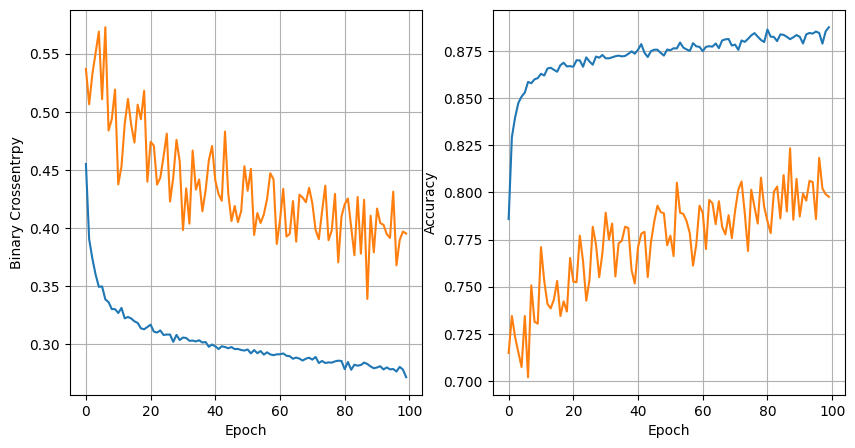

119/119 [==============================] - 1s 4ms/step - loss: 0.3084 - accuracy: 0.8709
64 nodes, 0.2 dropout, 0.001 lr, 64 batch_size


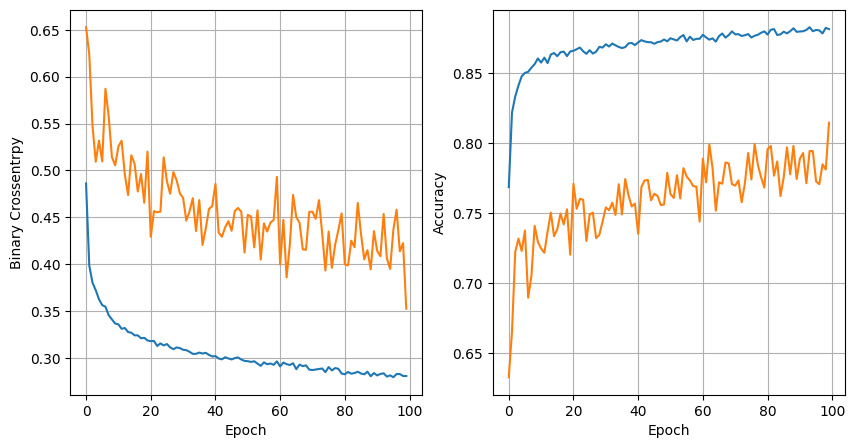

119/119 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8754
64 nodes, 0.2 dropout, 0.001 lr, 128 batch_size


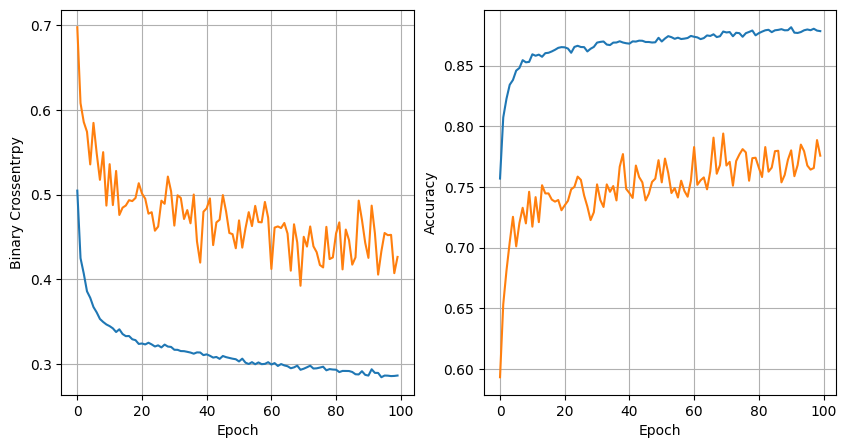

119/119 [==============================] - 0s 3ms/step - loss: 0.3052 - accuracy: 0.8751


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, {dropout_prob} dropout, {lr} lr, {batch_size} batch_size")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1318
           1       0.88      0.95      0.91      2486

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

